### TEJAPI_MediumWeek4

In [1]:
import pandas as pd 
import numpy as np
import tejapi
tejapi.ApiConfig.api_key = "J8izMRikpqEcmWvAiy6LaHIb0j2y5G"
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt

In [2]:
stk_num = '0050'
stk_data = tejapi.get('TWN/EWPRCD',coid = stk_num,paginate = True
                      ,opts= {'columns':['coid','mdate','open_d','high_d','low_d','close_d']}) #未調整股價
stk_adj = tejapi.get('TWN/EWPRCD',coid = stk_num,paginate = True
                    ,opts= {'columns':['coid','mdate','open_adj','high_adj','low_adj','close_adj']}) #調整後股價
yf_data = pdr.DataReader(stk_num+'.tw','yahoo') # Yahoo Finance股價

In [3]:
stk_data.tail()

,coid,mdate,open_d,high_d,low_d,close_d
None,,,,,,
4383,0050,2021-03-25 00:00:00+00:00,131.10,132.55,130.60,131.95
4384,0050,2021-03-26 00:00:00+00:00,133.05,134.40,132.55,134.35
4385,0050,2021-03-29 00:00:00+00:00,135.20,135.90,135.05,135.45
4386,0050,2021-03-30 00:00:00+00:00,135.80,135.95,135.20,135.90
4387,0050,2021-03-31 00:00:00+00:00,135.80,135.80,134.60,134.75


In [4]:
stk_adj.tail()

,coid,mdate,open_adj,high_adj,low_adj,close_adj
None,,,,,,
4383,0050,2021-03-25 00:00:00+00:00,131.10,132.55,130.60,131.95
4384,0050,2021-03-26 00:00:00+00:00,133.05,134.40,132.55,134.35
4385,0050,2021-03-29 00:00:00+00:00,135.20,135.90,135.05,135.45
4386,0050,2021-03-30 00:00:00+00:00,135.80,135.95,135.20,135.90
4387,0050,2021-03-31 00:00:00+00:00,135.80,135.80,134.60,134.75


In [5]:
yf_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-25,132.550003,130.600006,131.100006,131.949997,4885017.0,131.949997
2021-03-26,134.399994,132.550003,133.050003,134.350006,7969939.0,134.350006
2021-03-29,135.899994,135.050003,135.199997,135.449997,8065834.0,135.449997
2021-03-30,135.949997,135.199997,135.800003,135.899994,4763248.0,135.899994
2021-03-31,135.800003,134.600006,135.800003,134.750000,7752690.0,134.750000


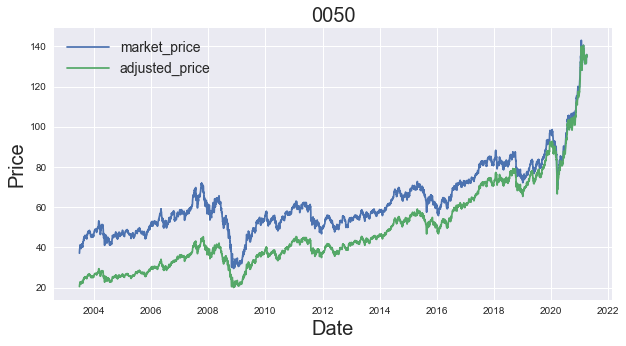

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.title('0050',fontsize = 20)
l1 = plt.plot(stk_data.mdate,stk_data.close_d,label = 'market_price')
l2 = plt.plot(stk_adj.mdate,stk_adj.close_adj,label = 'adjusted_price')
params = {'legend.fontsize': 14,
          'legend.handlelength': 3,
         'axes.labelsize': 25}
plt.rcParams.update(params)
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [7]:
# 調整後和未調整股價 報酬率差異
buy_price_mp, buy_price_adj = stk_data.close_d.values[0], stk_adj.close_adj.values[0]
sell_price_mp, sell_price_adj = stk_data.close_d.values[-1], stk_adj.close_adj.values[-1]
return_mp, return_adj = ((sell_price_mp-buy_price_mp)/buy_price_mp), ((sell_price_adj-buy_price_adj)/buy_price_adj)
print("未調整股價報酬率:",return_mp,"調整股價報酬率:", return_adj)

未調整股價報酬率: 2.6340345199568502 調整股價報酬率: 5.578754650288537


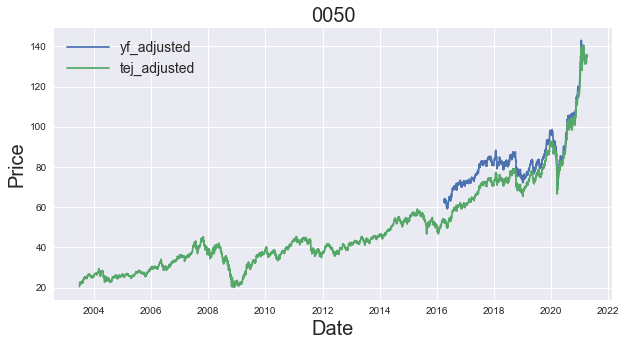

In [8]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.title('0050',fontsize = 20)
l1 = plt.plot(yf_data.index,yf_data['Adj Close'],label = 'yf_adjusted')
l2 = plt.plot(stk_adj.mdate,stk_adj.close_adj,label = 'tej_adjusted')
params = {'legend.fontsize': 14,
          'legend.handlelength': 3,
         'axes.labelsize': 25}
plt.rcParams.update(params)
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [9]:
# yf調整後收盤和 tej調整後收盤 報酬率差異
buy_price_yf, buy_price_adj = yf_data['Adj Close'].values[0], stk_adj.close_adj.values[0]
sell_price_yf, sell_price_adj = yf_data['Adj Close'].values[-1], stk_adj.close_adj.values[-1]
return_yf, return_adj = (sell_price_yf-buy_price_yf)/buy_price_yf, (sell_price_adj-buy_price_adj)/buy_price_adj
print("yf調整後收盤報酬率:",return_yf,"tej調整後收盤報酬率:", return_adj)

yf調整後收盤報酬率: 1.108763642915212 tej調整後收盤報酬率: 5.578754650288537


In [10]:
# 這裡所使用的資料庫日期較長，故權限要求較高，一般的 key 無法訪問
stk_info = pd.read_csv('TW50.csv', encoding='utf-8')
'''
如果讀取檔案出來是亂碼的話
解決方法是：用記事本開啟csv檔案，另存為設定編碼為utf-8，然後重新讀取檔案設定encoding='utf-8'就好了。
'''

stk_name = stk_info['成份股'].apply(lambda x :x[5:]).tolist()
stk_info['stk_name'] = stk_name
stk_nums = stk_info['成份股'].apply(lambda x :x[:4]).tolist()
stk_info['coid'] = stk_nums
# 創建一個儲存結果的 dataframe
result = pd.DataFrame(columns=['stk_ID','stk_name','start_date_tej','end_date_tej','start_date_yf','end_date_yf','ret_tej','ret_yf','unadjust_ret_tej'])
i=0
for stk_num in stk_nums:
    # 撈取資料
    stk_data = tejapi.get('TWN/APRCD',coid = stk_num,paginate = True) #未調整股價
    stk_adj = tejapi.get('TWN/APRCD1',coid = stk_num,paginate = True) #調整後股價
    stk_code = stk_num +'.TW'
    yf_data = pdr.DataReader(stk_code,'yahoo')
    # 調整後和未調整股價 報酬率差異
    buy_price_mp, buy_price_adj = stk_data.close_d.values[0], stk_adj.close_adj.values[0]
    sell_price_mp, sell_price_adj = stk_data.close_d.values[-1], stk_adj.close_adj.values[-1]
    return_mp, return_adj = (sell_price_mp-buy_price_mp)/buy_price_mp, (sell_price_adj-buy_price_adj)/buy_price_adj
    # yf調整後收盤和tej調整後收盤 報酬率差異
    buy_price_yf, buy_price_adj = yf_data['Adj Close'].values[0], stk_adj.close_adj.values[0]
    sell_price_yf, sell_price_adj = yf_data['Adj Close'].values[-1], stk_adj.close_adj.values[-1]
    return_yf, return_adj = (sell_price_yf-buy_price_yf)/buy_price_yf, (sell_price_adj-buy_price_adj)/buy_price_adj
    # 插入列
    #index_ = 
    result.loc[i,:] = stk_num, stk_info.stk_name[stk_info.coid==stk_num].values[0], stk_adj.mdate.tolist()[0], stk_adj.mdate.tolist()[-1],yf_data.index.tolist()[0], yf_data.index.tolist()[-1], return_adj, return_yf, return_mp
    i+=1
    print(stk_num)

1101
1102
1216
1301
1303
1326
1402
2002
2105
2207
2303
2308
2317
2327
2330
2357
2379
2382
2395
2408
2412
2454
2474
2633
2801
2880
2881
2882
2883
2884
2885
2886
2887
2890
2891
2892
2912
3008
3034
3045
3711
4904
4938
5871
5876
5880
6415
6505
6669
9910


In [11]:
# 計算 yf與 tej之報酬率差異
result['difference'] = abs((result.ret_yf-result.ret_tej)/result.ret_tej)

In [12]:
# 問題一 調整後股價所計算支持有報酬率，tej和yahoo finance在資料品質上有很大的差異
result.sort_values(by='difference',ascending=False).reset_index(drop=True)

,stk_ID,stk_name,start_date_tej,end_date_tej,start_date_yf,end_date_yf,ret_tej,ret_yf,unadjust_ret_tej,difference
0,2303,聯電,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,0.354432,3.713276,-0.576371,9.476687
1,6669,緯穎,2019-03-27 00:00:00+00:00,2021-03-31 00:00:00+00:00,2017-11-13 00:00:00,2021-03-31 00:00:00,1.400364,7.373589,1.230159,4.265482
2,2408,南亞科,2000-08-17 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,-0.900304,2.055095,0.392424,3.282668
3,2883,開發金,2001-12-28 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,0.186736,0.628439,-0.537445,2.365393
4,5876,上海商銀,2018-10-19 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,0.265407,0.859277,0.136856,2.237589
5,2633,台灣高鐵,2016-10-27 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,0.463941,1.251156,0.307692,1.696796
6,2105,正新,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,12.656325,-0.09126,0.746377,1.007211
7,2474,可成,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,14.015335,0.062367,-0.107595,0.99555
8,3008,大立光,2002-03-11 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,43.070887,0.388867,13.657534,0.990971
9,2207,和泰車,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,76.517336,0.989587,28.108911,0.987067


In [13]:
result[result.start_date_tej.astype(str) != result.start_date_yf.astype(str)].reset_index(drop=True)

,stk_ID,stk_name,start_date_tej,end_date_tej,start_date_yf,end_date_yf,ret_tej,ret_yf,unadjust_ret_tej,difference
0,1101,台泥,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,4.166703,1.434067,0.352601,0.655827
1,1102,亞泥,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,6.691194,1.087649,0.620339,0.837451
2,1216,統一,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,10.02769,0.608991,1.754717,0.939269
3,1301,台塑,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,6.192349,0.634444,0.553846,0.897544
4,1303,南亞,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,3.827878,0.564684,0.085714,0.852481
5,1326,台化,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,9.154049,0.414697,1.100719,0.954698
6,1402,遠東新,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,0.595157,0.465922,-0.620126,0.217146
7,2002,中鋼,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,4.33251,0.38132,0.044355,0.911986
8,2105,正新,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,12.656325,-0.09126,0.746377,1.007211
9,2207,和泰車,2000-01-04 00:00:00+00:00,2021-03-31 00:00:00+00:00,2016-04-01 00:00:00,2021-03-31 00:00:00,76.517336,0.989587,28.108911,0.987067


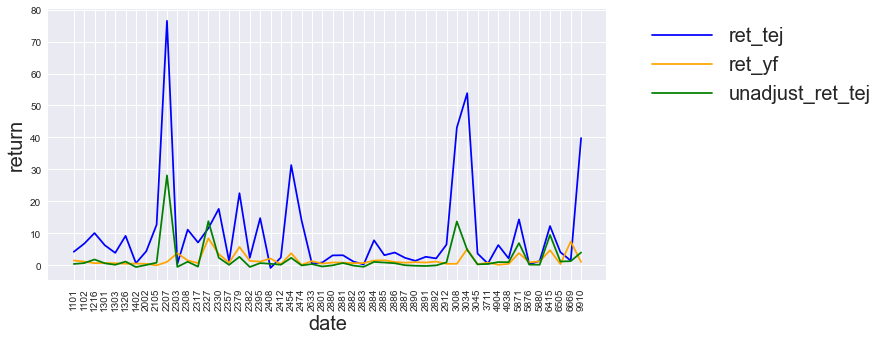

In [14]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.plot(result.stk_ID,result.ret_tej,label = 'ret_tej',color = 'blue')
plt.plot(result.stk_ID,result.ret_yf,label = 'ret_yf',color = 'orange')
plt.plot(result.stk_ID,result.unadjust_ret_tej,label = 'unadjust_ret_tej',color = 'green')
params = {'legend.fontsize': 14,
          'legend.handlelength': 3,
         'axes.labelsize': 25}
plt.rcParams.update(params)
plt.legend(loc="upper left",fontsize=20,bbox_to_anchor=(1.05, 1))
plt.xlabel('date', fontsize=20)
plt.ylabel('return', fontsize=20)
plt.show()